### Lead Scoring Case Study

#### Our Goals of the Case Study:

1. To identify the hot leads , so that sales team can focus on the hot leads.
2. Company require to build a model where we need to assign a lead score to each of the lead so that customer which having high score have high conversion chances. The score should be between 0 and 100.
3. To get to know the which columns are most important and which is not important.

In [4]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

### Importing Data & Inspecting the Dataframe

In [5]:
# Importings Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Importing datasets
lead = pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
# To get to know the total number of columns and rows
lead.shape

(9240, 37)

In [8]:
# let's look at the statistical aspects of the dataframe
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
# Let's see the type of each column
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Data Cleaning

In [10]:
# To get to know the percentage null values in each columns
lead_null_percentage = lead.isnull().sum()/len(lead)*100
lead_null_percentage

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [11]:
# To Get the list of columns which has more than 20 percentage of null values.
drop_columns = lead_null_percentage[lead_null_percentage>20].index.tolist()
drop_columns

['Country',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [12]:
# Removing the columns which is having high percentage of null values and not much related to case study : 
# Colunms : Asymmetrique Activity Index , Asymmetrique Profile Index , Asymmetrique Activity Score , Asymmetrique Profile Score ,Lead Profile , Lead Quality , Tags , What matters most to you in choosing a course , What is your current occupation , How did you hear about X Education , Country
lead = lead.drop(columns=drop_columns,axis=1)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,Mumbai,No,No,Modified


In [13]:
# To get to know the null values in the columns
lead.isnull().sum()

Prospect ID                                    0
Lead Number                                    0
Lead Origin                                    0
Lead Source                                   36
Do Not Email                                   0
Do Not Call                                    0
Converted                                      0
TotalVisits                                  137
Total Time Spent on Website                    0
Page Views Per Visit                         137
Last Activity                                103
Specialization                              1438
Search                                         0
Magazine                                       0
Newspaper Article                              0
X Education Forums                             0
Newspaper                                      0
Digital Advertisement                          0
Through Recommendations                        0
Receive More Updates About Our Courses         0
Update me on Supply 

In [14]:
# To get to know what are the categorical values in the column "City"
lead["City"].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [15]:
# To get to know what are the categorical values in the column "Specialization"
lead["Specialization"].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [16]:
# As 2.2k values are not selected and 1.4k are null values this sumup 3.6k which is 40% , so droping the column.
# As 1.9k values are not selected and 1.4k are null values this sumup 3.3k which is 35.85% , so droping the column.
lead = lead.drop(columns=["City","Specialization"],axis =1)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [17]:
# To get to know the null values in the columns
lead.isnull().sum()

Prospect ID                                   0
Lead Number                                   0
Lead Origin                                   0
Lead Source                                  36
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                 137
Total Time Spent on Website                   0
Page Views Per Visit                        137
Last Activity                               103
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                       0
Receive More Updates About Our Courses        0
Update me on Supply Chain Content             0
Get updates on DM Content               

In [18]:
# As the columns which having the null values are important columns , i am not dropping the column i am dropping the rows which having the null values.
# Not substituting the any value beacuse it will hamper the data set
lead = lead.dropna(subset=['TotalVisits', 'Page Views Per Visit', 'Last Activity','Lead Source'])
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,No,No,No,No,Modified


In [19]:
# To get to know the null values in the columns
lead.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Update me on Supply Chain Content           0
Get updates on DM Content                   0
I agree to pay the amount through 

In [20]:
# Dropping the columns which is not related to the problem statement.
lead.drop(columns=['Lead Number','Search','Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement','I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],axis=1, inplace =True)

In [21]:
lead.shape

(9074, 15)

In [22]:
# To get to know the null values in the columns
lead.isnull().sum()

Prospect ID                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Through Recommendations                   0
Receive More Updates About Our Courses    0
Update me on Supply Chain Content         0
Get updates on DM Content                 0
Last Notable Activity                     0
dtype: int64

In [23]:
# Checking the Duplicate
lead[lead.duplicated()]

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Last Notable Activity


#### Not found any duplicates

In [24]:
# To check the data splitting for the target variable.
lead["Converted"].value_counts(normalize=True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

#### 37.8% conversion rate 

## EDA

In [25]:
# Get to know the data type of the columns
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Do Not Email                            9074 non-null   object 
 4   Do Not Call                             9074 non-null   object 
 5   Converted                               9074 non-null   int64  
 6   TotalVisits                             9074 non-null   float64
 7   Total Time Spent on Website             9074 non-null   int64  
 8   Page Views Per Visit                    9074 non-null   float64
 9   Last Activity                           9074 non-null   object 
 10  Through Recommendations                 9074 non-null   obje

In [26]:
lead.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,No,No,No,No,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,No,No,No,No,Modified


In [27]:
# Dviding the dataset columns into two parts categorical and continuous
categorical_columns = ['Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call',  'Last Activity',
       'Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Last Notable Activity']
continuous_columns = ['TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit']

### Uni-varient 

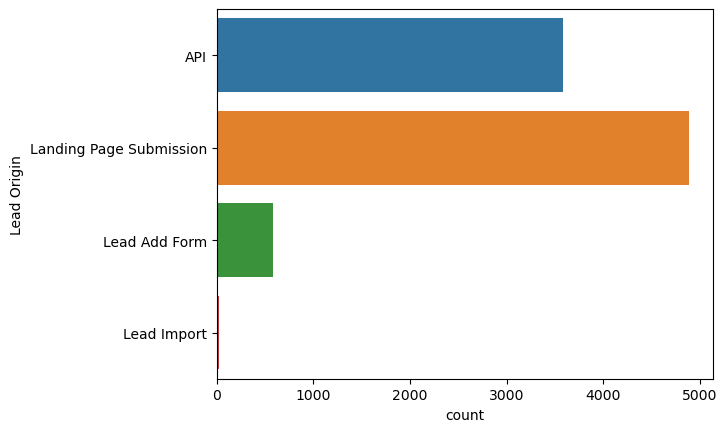

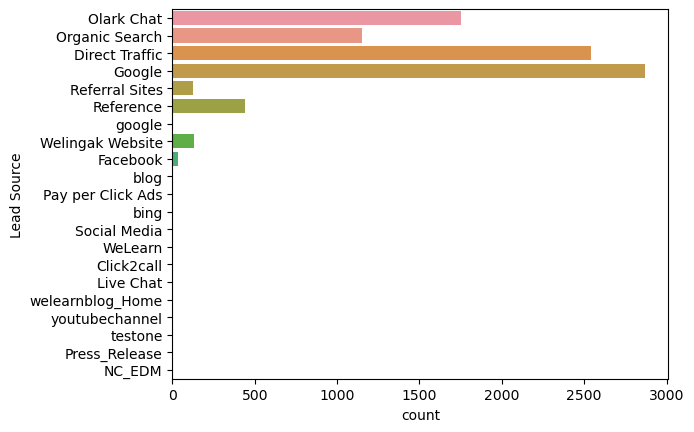

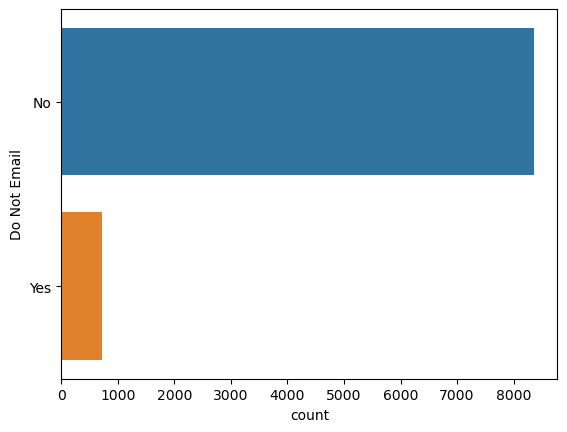

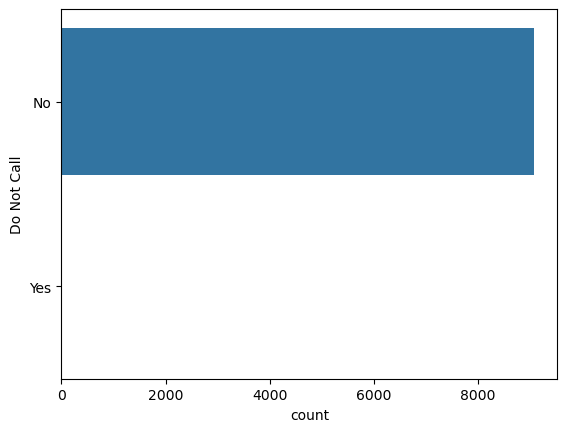

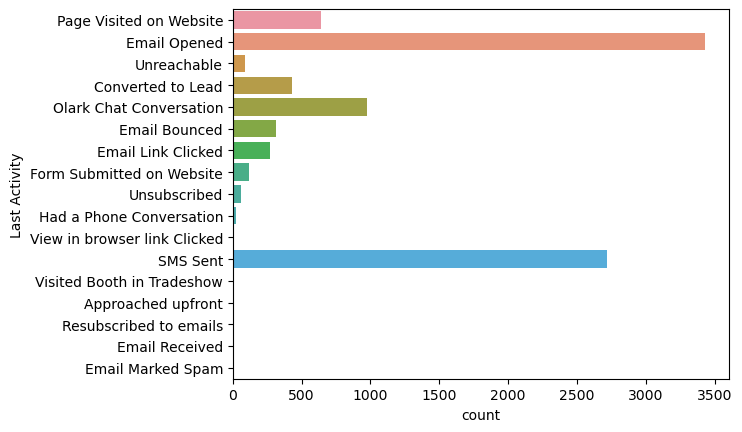

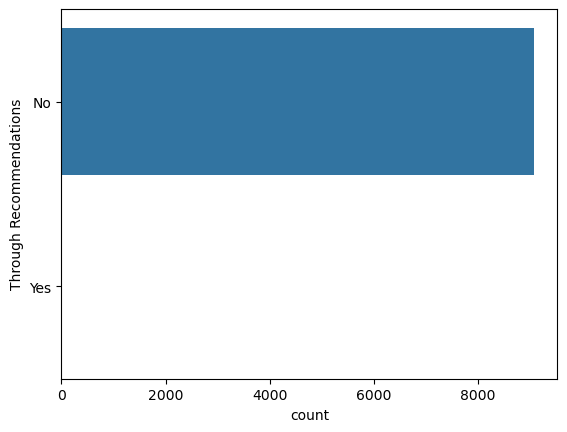

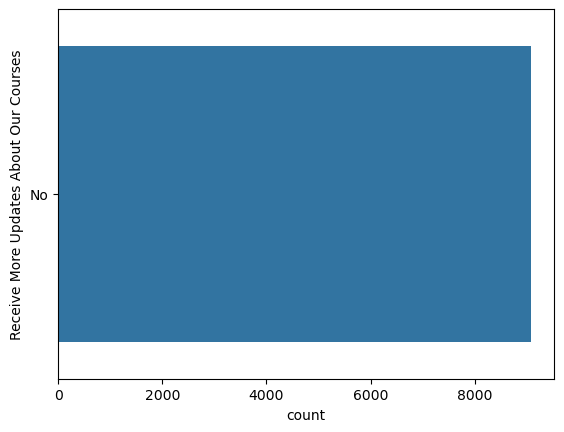

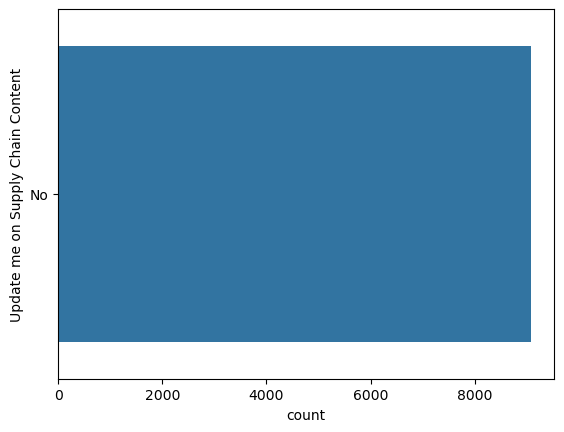

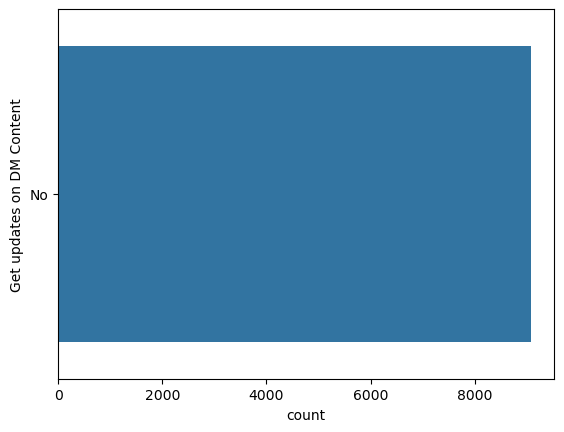

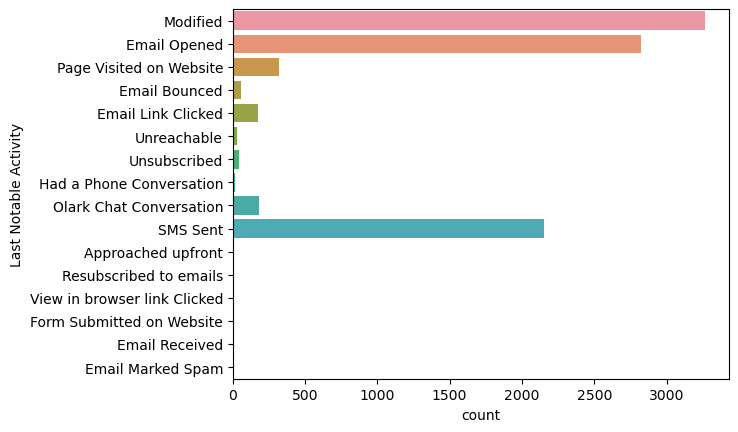

In [28]:
# Making grphs for the categorical variables
for i in categorical_columns:
    sns.countplot(data=lead,y=i)
    plt.show()

#### Inference from the above graphs:
1. "Do not call" columns only contains the "yes" so we will drop it.
2. "Through Recommendations" column only contain "no" so we will drop it.
3. "Receive More Updates About Our Courses" column only contains "no" so we will drop it.
4. "Update me on Supply Chain Content" column only contain "no" so we will drop it.
5. "Get updates on DM Content" column only contain "no" so we will drop it.

In [29]:
# Dropping the columns which doesnt give input for making the model.
lead.drop(columns=['Do Not Call','Through Recommendations', 'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content'],axis=1, inplace =True)

In [30]:
# As we drop the columns the categorical columns which are left behind.
categorical_columns = ['Lead Origin', 'Lead Source', 'Do Not Email','Last Activity',
       'Last Notable Activity']

In [31]:
# To check how and which columns are left.
print(lead.shape)
print(lead.columns)

(9074, 10)
Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Last Notable Activity'],
      dtype='object')


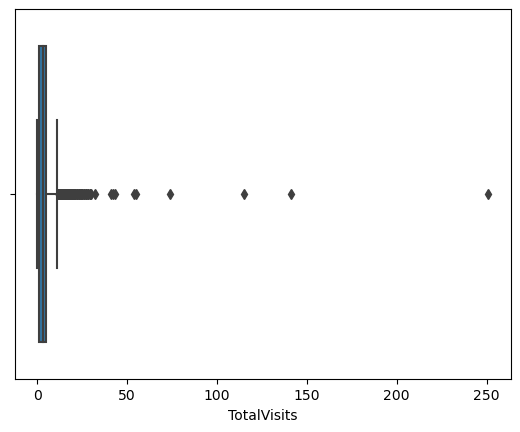

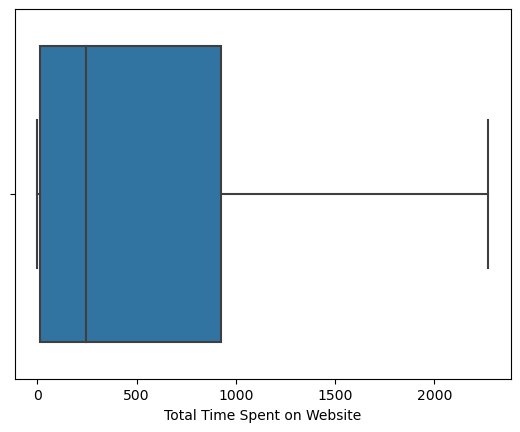

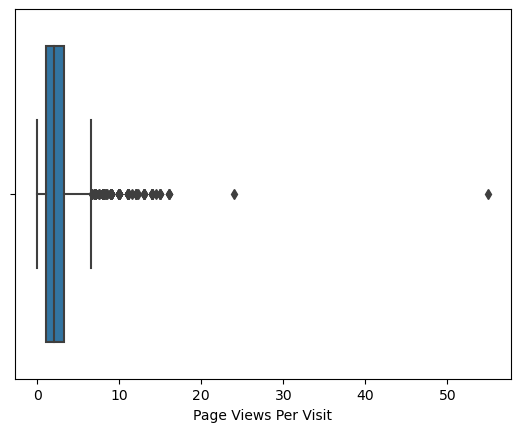

In [32]:
# Making grphs for the continuous variables
for i in continuous_columns:
    sns.boxplot(lead[i])
    plt.show()

#### Inference from the above graphs:
1. Total visit column and Page Views Per Visit are having outliers

In [33]:
# Removing the outliers from "TotalVisits"
lead = lead[lead["TotalVisits"]<=35]

In [34]:
# Removing the outliers from "Page Views Per Visit"
lead = lead[lead["Page Views Per Visit"]<=20]

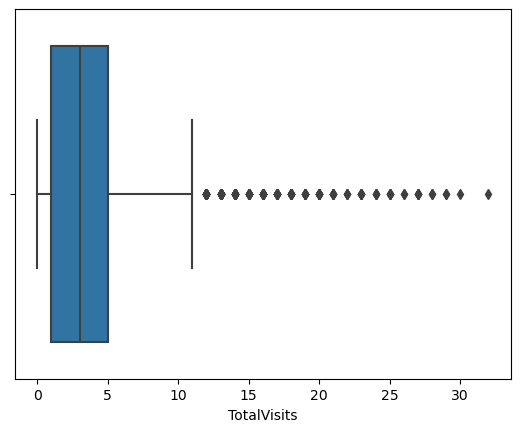

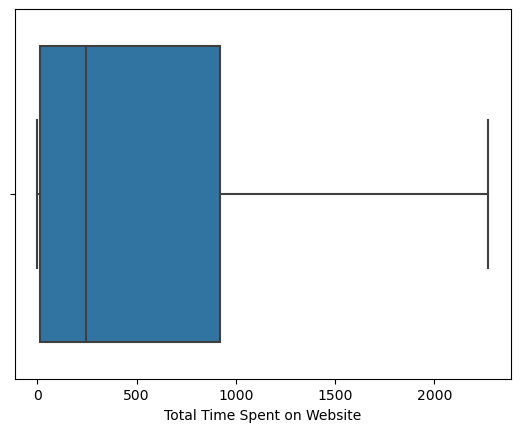

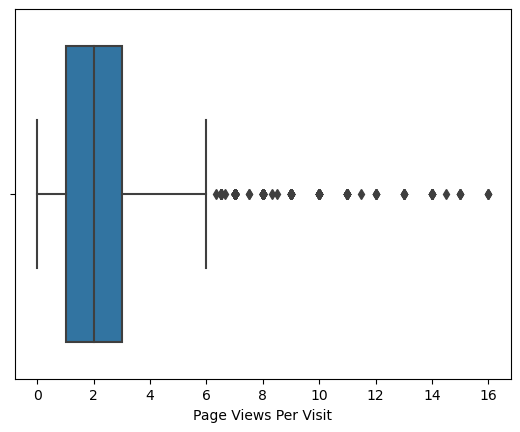

In [35]:
# Making grphs for the continuous variables after removing the outliers.
for i in continuous_columns:
    sns.boxplot(lead[i])
    plt.show()

### Bi-varient 

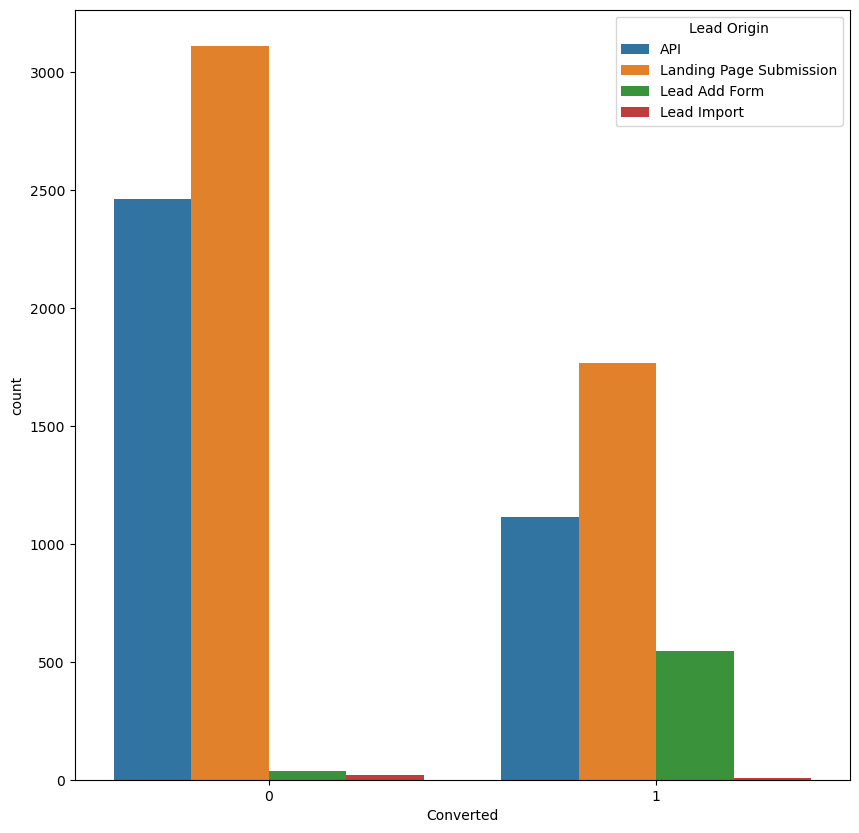

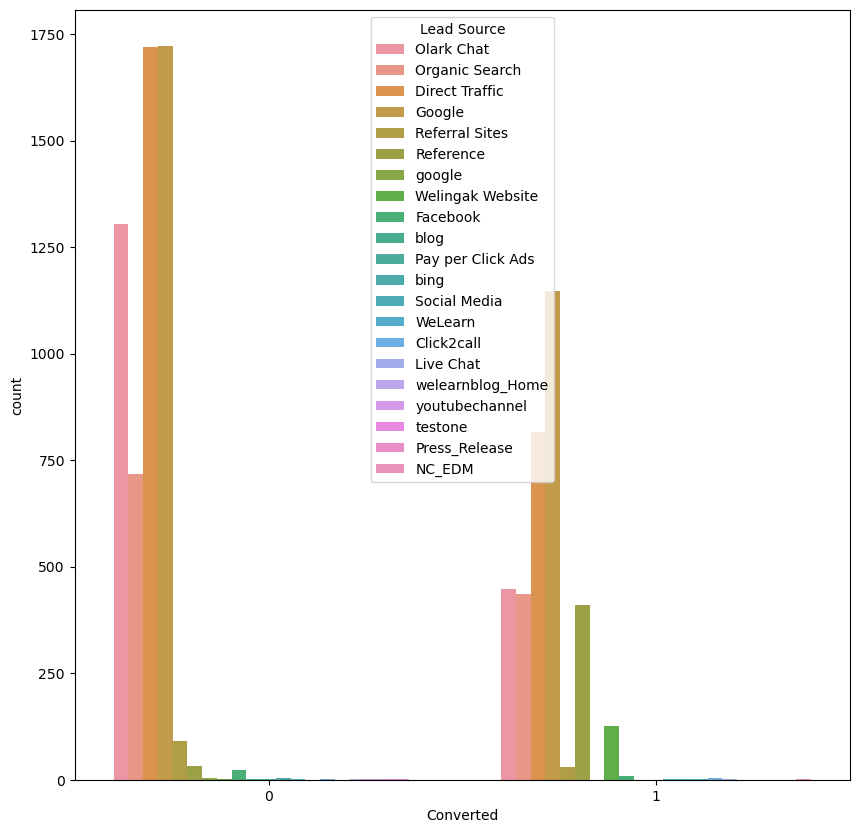

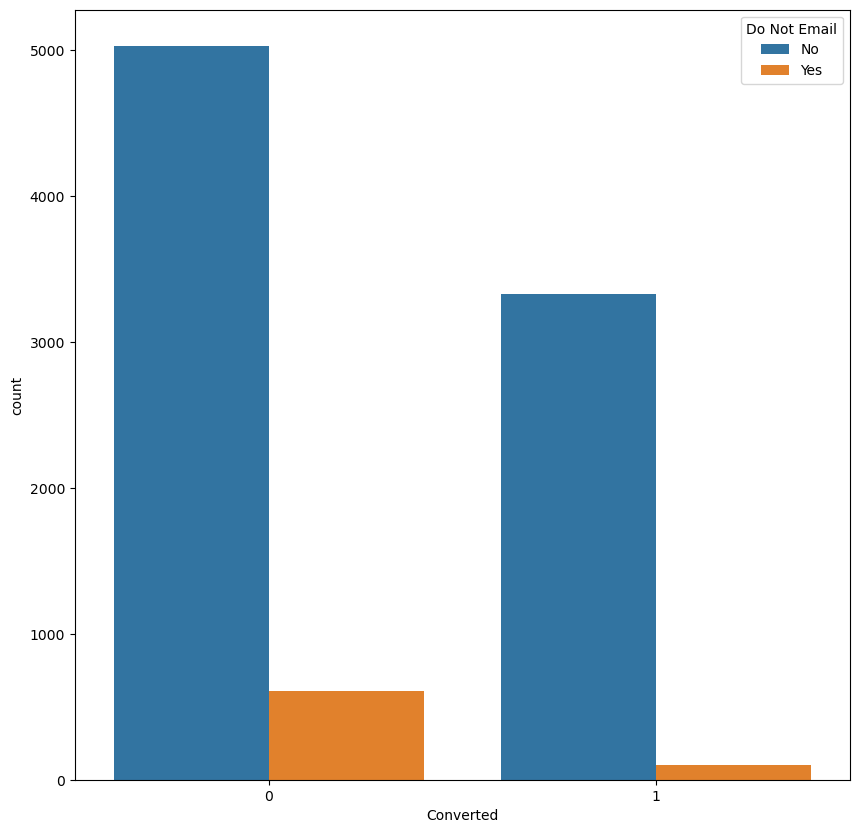

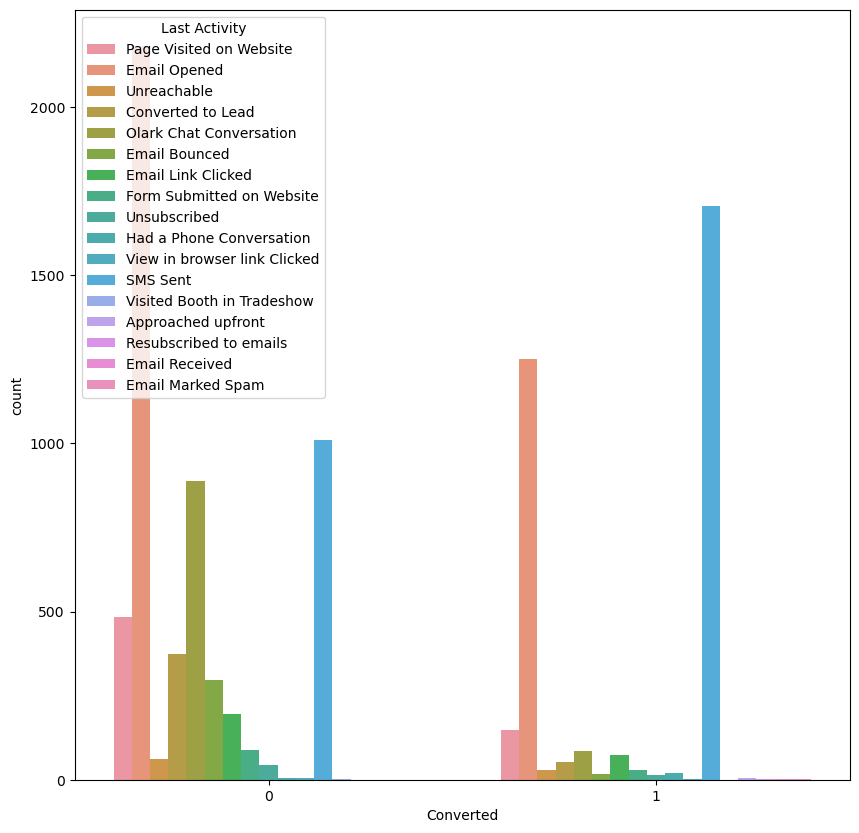

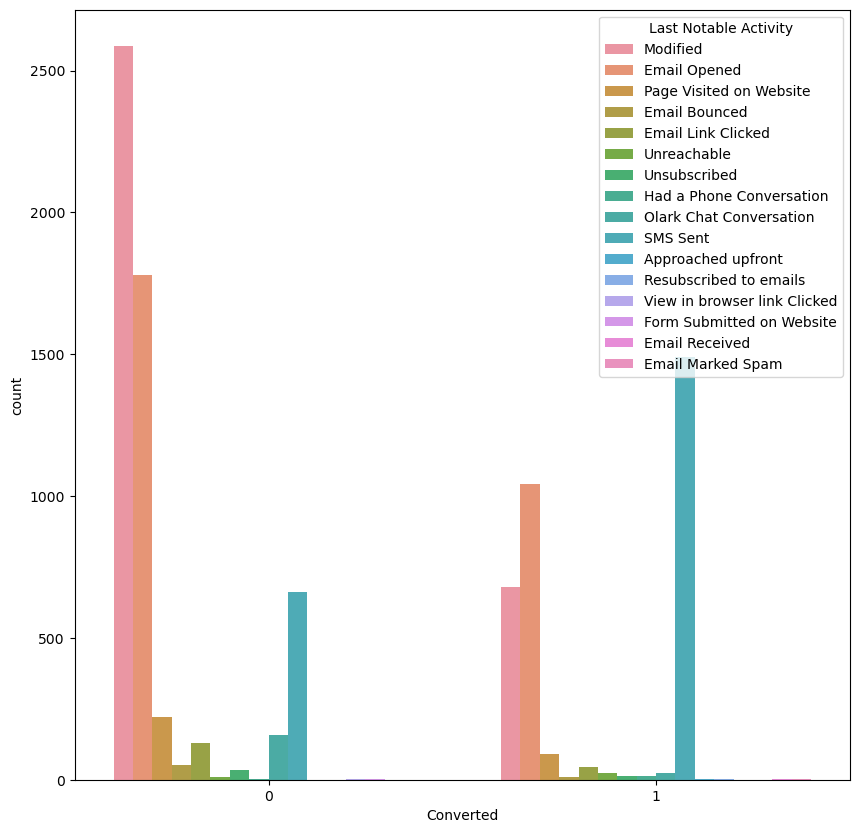

In [36]:
# Graphs of categorical columns
for i in categorical_columns:
    plt.figure(figsize=(10,10))
    sns.countplot(data = lead , x="Converted" , hue=i)
    plt.show()

#### Inference from the above graphs
1. Most of the leads are comming from landing page Submission 
2. Most of the people say "no" in do not email but ratio of no vs yes is more in not conversion lead.
3. if a person marked the email as a spam , it generally means he is not intrested in the course , it is the waste of time to run behind him,

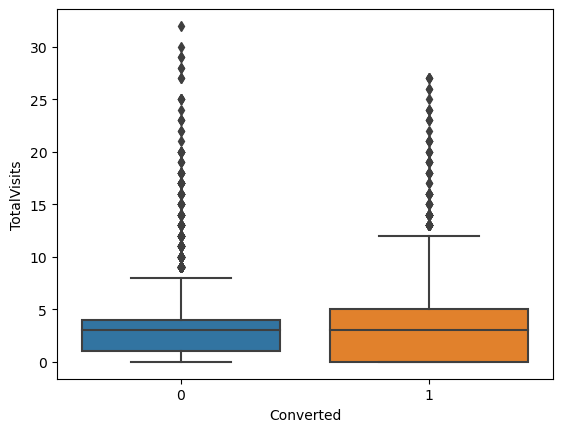

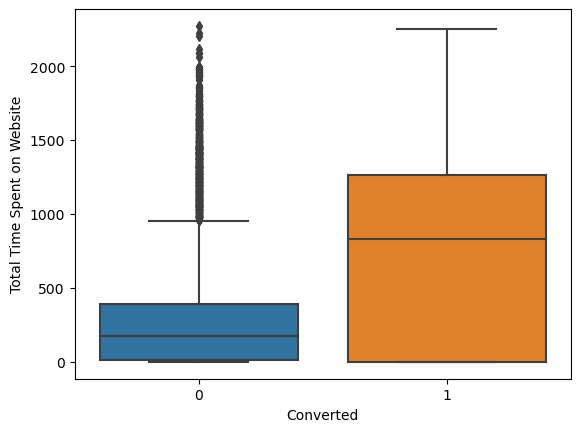

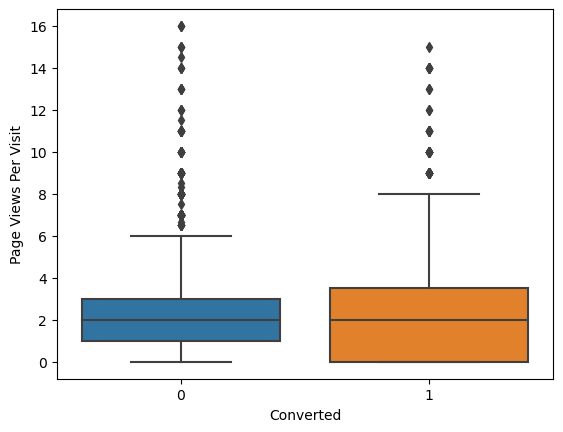

In [37]:
# Graphs of continuous_columns
for i in continuous_columns:
    sns.boxplot(x="Converted",y=i,data = lead)
    plt.show()

#### Inference from the above graphs:
1. In "TotalVisits" mean is more or less same in both converted and non- converted lead.
2. In "Total Time Spent on website" mean is more in converted lead than non- converted lead.
3. In "Page views Per Visit" mean is more or less same in both converted and non-converted lead.

In [38]:
# let's look at the statistical aspects of the dataframe
lead.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9064.000000,9064.000000,9064.000000,9064.000000
mean,0.378751,3.367167,482.667807,2.359405
std,0.485103,3.426633,545.224394,2.073430
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,921.250000,3.000000
max,1.000000,32.000000,2272.000000,16.000000


### Data Preperation

In [39]:
# Checking the head of the dataframe
lead.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Modified


In [40]:
# To check how many categories are in a column.
lead["Do Not Email"].value_counts()

No     8354
Yes     710
Name: Do Not Email, dtype: int64

#### Change "yes" to 1 and "No" to 0 in "Do Not Email"

In [41]:
lead["Do Not Email"] = lead["Do Not Email"].map({"Yes" : 1 , "No" : 0})

In [42]:
# Checking if it is converted.
lead["Do Not Email"].value_counts()

0    8354
1     710
Name: Do Not Email, dtype: int64

#### Making dummies for categorical variables.

In [43]:
# for categorical columns making dummies
dummy_data = pd.get_dummies(lead[["Lead Origin","Lead Source","Last Activity","Last Notable Activity"]],drop_first = True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [44]:
# Concatinating the lead and dummy data
lead = pd.concat([lead,dummy_data], axis=1)
lead.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Last Notable Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Modified,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Modified,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Modified,...,0,0,1,0,0,0,0,0,0,0


In [45]:
# Dropping the columns which are already maked as dummy 
lead = lead.drop(columns=["Lead Origin","Lead Source","Last Activity","Last Notable Activity"], axis=1)
lead.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Splitting the data into tain and test set

In [46]:
from sklearn.model_selection import train_test_split
X = lead.drop(columns = ["Prospect ID" , "Converted"] , axis =1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [47]:
y = lead["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [48]:
# Splitting the data for train and test set.
X_train , X_test , y_train , y_test = train_test_split(X,y,train_size = 0.7 ,test_size = 0.3 , random_state = 100)

### Feature Scaling

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6344.000000,6.344000e+03,6.344000e+03,6.344000e+03,6344.000000,6344.000000,6344.000000,6344.000000,6344.000000,6344.000000,...,6344.000000,6344.000000,6344.000000,6344.000000,6344.000000,6344.0,6344.000000,6344.000000,6344.000000,6344.000000
mean,0.077081,1.525682e-16,-3.081814e-17,-9.562198e-17,0.538934,0.063367,0.003783,0.278846,0.003941,0.321248,...,0.000158,0.001419,0.361602,0.017812,0.035309,0.0,0.231557,0.003941,0.005044,0.000158
std,0.266740,1.000079e+00,1.000079e+00,1.000079e+00,0.498521,0.243641,0.061395,0.448467,0.062656,0.466993,...,0.012555,0.037641,0.480502,0.132278,0.184574,0.0,0.421861,0.062656,0.070848,0.012555
min,0.000000,-9.810963e-01,-8.777663e-01,-1.134477e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-6.888450e-01,-8.634330e-01,-6.526249e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-1.043425e-01,-4.338955e-01,-1.707733e-01,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,0.000000,4.801600e-01,7.761147e-01,3.110784e-01,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,1.000000,8.370944e+00,3.324210e+00,6.575150e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


#### Feature Selection Using RFE

In [50]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 20)            
rfe = rfe.fit(X_train, y_train)

In [51]:
# Viewing columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Lead Source_google', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Received',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')

## Model Building

In [52]:
import statsmodels.api as sm

In [53]:
# Model 1
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2844.6
Date:                Mon, 14 Aug 2023   Deviance:                       5689.2
Time:                        20:56:39   Pearson chi2:                 6.52e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3487
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.1360      0.051    -22.175      0.000      -1.236      -1.036
Do Not Email                                      -1.4490      0.207     -7.016      0.000      -1.854      -1.044
Total Time Spent on Website                        1.1188      0.039     28.752      0.000       1.043       1.195
Lead Origin_Lead Add Form                          1.7566      1.161      1.513      0.130      -0.519       4.033
Lead Origin_Lead Import                            1.5375      0.432      3.561      0.000       0.691       2.384
Lead Source_Olark Chat                             1.0793      0.098     10.961      0.000       0.886       1.272
Lead Source_Reference                              2.3932      1.182      2.025      0.043       0.077       4.710
Lead Source_Social Media                          24.2145   4.82e+04      0.001      1.000   -9.44e+04    9.45e+04
Lead Source_Welingak Website                       3.8453      1.369      2.809      0.005       1.162       6.528
Lead Source_google                               -21.4809   2.09e+04     -0.001      0.999    -4.1e+04    4.09e+04
Last Activity_Converted to Lead                   -1.1158      0.190     -5.866      0.000      -1.489      -0.743
Last Activity_Email Bounced                       -1.3507      0.502     -2.690      0.007      -2.335      -0.367
Last Activity_Email Received                      22.6591    3.3e+04      0.001      0.999   -6.47e+04    6.47e+04
Last Activity_Had a Phone Conversation             0.6524      0.826      0.790      0.429      -0.966       2.271
Last Activity_Olark Chat Conversation             -1.4796      0.154     -9.637      0.000      -1.781      -1.179
Last Activity_Page Visited on Website             -0.5542      0.142     -3.906      0.000      -0.832      -0.276
Last Notable Activity_Email Bounced                1.7058      0.654      2.606      0.009       0.423       2.988
Last Notable Activity_Had a Phone Conversation     2.4223      1.379      1.756      0.079      -0.281       5.125
Last Notable Activity_SMS Sent                     1.4801      0.080     18.615      0.000       1.324       1.636
Last Notable Activity_Unreachable                  1.3738      0.477      2.879      0.004       0.438       2.309
Last Notable Activity_Unsubscribed                 1.4525      0.478      3.037      0.002       0.515       2.390
==================================================================================================================
"""

#### As Lead_source_socialMedia P value is 1 which is high so we will dop it first

In [54]:
col1= cols.drop("Lead Source_Social Media")

In [55]:
# Model 2
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6324
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2846.4
Date:                Mon, 14 Aug 2023   Deviance:                       5692.8
Time:                        20:56:39   Pearson chi2:                 6.52e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3483
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.1353      0.051    -22.165      0.000      -1.236      -1.035
Do Not Email                                      -1.4497      0.207     -7.020      0.000      -1.854      -1.045
Total Time Spent on Website                        1.1192      0.039     28.761      0.000       1.043       1.195
Lead Origin_Lead Add Form                          1.7573      1.161      1.513      0.130      -0.519       4.033
Lead Origin_Lead Import                            1.5370      0.432      3.560      0.000       0.691       2.383
Lead Source_Olark Chat                             1.0756      0.098     10.927      0.000       0.883       1.269
Lead Source_Reference                              2.3916      1.182      2.023      0.043       0.075       4.708
Lead Source_Welingak Website                       3.8432      1.369      2.807      0.005       1.160       6.527
Lead Source_google                               -21.4815   2.09e+04     -0.001      0.999    -4.1e+04    4.09e+04
Last Activity_Converted to Lead                   -1.1168      0.190     -5.871      0.000      -1.490      -0.744
Last Activity_Email Bounced                       -1.3506      0.502     -2.690      0.007      -2.335      -0.367
Last Activity_Email Received                      22.6581    3.3e+04      0.001      0.999   -6.46e+04    6.47e+04
Last Activity_Had a Phone Conversation             0.6515      0.826      0.789      0.430      -0.967       2.270
Last Activity_Olark Chat Conversation             -1.4611      0.153     -9.576      0.000      -1.760      -1.162
Last Activity_Page Visited on Website             -0.5549      0.142     -3.910      0.000      -0.833      -0.277
Last Notable Activity_Email Bounced                1.7060      0.655      2.606      0.009       0.423       2.989
Last Notable Activity_Had a Phone Conversation     2.4226      1.379      1.757      0.079      -0.280       5.126
Last Notable Activity_SMS Sent                     1.4800      0.080     18.614      0.000       1.324       1.636
Last Notable Activity_Unreachable                  1.3736      0.477      2.878      0.004       0.438       2.309
Last Notable Activity_Unsubscribed                 1.4531      0.478      3.038      0.002       0.516       2.390
==================================================================================================================
"""

#### Checking the VIF 

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,80.65
5,Lead Source_Reference,61.71
6,Lead Source_Welingak Website,20.11
15,Last Notable Activity_Had a Phone Conversation,2.13
11,Last Activity_Had a Phone Conversation,2.13
9,Last Activity_Email Bounced,2.08
0,Do Not Email,2.05
4,Lead Source_Olark Chat,1.56
12,Last Activity_Olark Chat Conversation,1.35
1,Total Time Spent on Website,1.26


In [57]:
# As P value and vif are higher so we are dropping the column
col2= col1.drop("Lead Origin_Lead Add Form")

In [58]:
# Model 3
X_train_sm = sm.add_constant(X_train[col2])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2847.8
Date:                Mon, 14 Aug 2023   Deviance:                       5695.6
Time:                        20:56:40   Pearson chi2:                 6.52e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3480
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.1343      0.051    -22.158      0.000      -1.235      -1.034
Do Not Email                                      -1.4523      0.206     -7.034      0.000      -1.857      -1.048
Total Time Spent on Website                        1.1194      0.039     28.783      0.000       1.043       1.196
Lead Origin_Lead Import                            1.5362      0.432      3.558      0.000       0.690       2.382
Lead Source_Olark Chat                             1.0779      0.098     10.961      0.000       0.885       1.271
Lead Source_Reference                              4.1481      0.224     18.557      0.000       3.710       4.586
Lead Source_Welingak Website                       5.6001      0.726      7.718      0.000       4.178       7.022
Lead Source_google                               -21.4854   2.09e+04     -0.001      0.999   -4.09e+04    4.09e+04
Last Activity_Converted to Lead                   -1.1179      0.190     -5.877      0.000      -1.491      -0.745
Last Activity_Email Bounced                       -1.3498      0.502     -2.689      0.007      -2.334      -0.366
Last Activity_Email Received                      22.6568    3.3e+04      0.001      0.999   -6.46e+04    6.47e+04
Last Activity_Had a Phone Conversation             0.6504      0.826      0.788      0.431      -0.968       2.269
Last Activity_Olark Chat Conversation             -1.4635      0.153     -9.593      0.000      -1.763      -1.165
Last Activity_Page Visited on Website             -0.5464      0.141     -3.862      0.000      -0.824      -0.269
Last Notable Activity_Email Bounced                1.7063      0.655      2.607      0.009       0.423       2.989
Last Notable Activity_Had a Phone Conversation     2.4227      1.379      1.757      0.079      -0.280       5.126
Last Notable Activity_SMS Sent                     1.4805      0.080     18.620      0.000       1.325       1.636
Last Notable Activity_Unreachable                  1.3724      0.477      2.875      0.004       0.437       2.308
Last Notable Activity_Unsubscribed                 1.4542      0.478      3.041      0.002       0.517       2.392
==================================================================================================================
"""

In [59]:
# Checking the VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Notable Activity_Had a Phone Conversation,2.13
10,Last Activity_Had a Phone Conversation,2.13
8,Last Activity_Email Bounced,2.08
0,Do Not Email,2.05
3,Lead Source_Olark Chat,1.56
11,Last Activity_Olark Chat Conversation,1.35
1,Total Time Spent on Website,1.26
13,Last Notable Activity_Email Bounced,1.25
15,Last Notable Activity_SMS Sent,1.16
17,Last Notable Activity_Unsubscribed,1.14


In [60]:
# VIF is ok , but we have to check all the p values.

In [61]:
# As P value is higher so we are dropping the column
col3= col2.drop("Lead Source_google")

In [62]:
# Model 4
X_train_sm = sm.add_constant(X_train[col3])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6326
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2849.1
Date:                Mon, 14 Aug 2023   Deviance:                       5698.2
Time:                        20:56:40   Pearson chi2:                 6.52e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.3477
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.1354      0.051    -22.181      0.000      -1.236      -1.035
Do Not Email                                      -1.4528      0.206     -7.040      0.000      -1.857      -1.048
Total Time Spent on Website                        1.1189      0.039     28.779      0.000       1.043       1.195
Lead Origin_Lead Import                            1.5369      0.432      3.560      0.000       0.691       2.383
Lead Source_Olark Chat                             1.0784      0.098     10.966      0.000       0.886       1.271
Lead Source_Reference                              4.1488      0.224     18.560      0.000       3.711       4.587
Lead Source_Welingak Website                       5.6007      0.726      7.719      0.000       4.179       7.023
Last Activity_Converted to Lead                   -1.1164      0.190     -5.870      0.000      -1.489      -0.744
Last Activity_Email Bounced                       -1.3480      0.502     -2.685      0.007      -2.332      -0.364
Last Activity_Email Received                      20.6584   1.21e+04      0.002      0.999   -2.38e+04    2.38e+04
Last Activity_Had a Phone Conversation             0.6518      0.826      0.789      0.430      -0.967       2.270
Last Activity_Olark Chat Conversation             -1.4628      0.153     -9.589      0.000      -1.762      -1.164
Last Activity_Page Visited on Website             -0.5528      0.141     -3.912      0.000      -0.830      -0.276
Last Notable Activity_Email Bounced                1.7064      0.654      2.607      0.009       0.424       2.989
Last Notable Activity_Had a Phone Conversation     2.4224      1.379      1.756      0.079      -0.281       5.125
Last Notable Activity_SMS Sent                     1.4816      0.080     18.636      0.000       1.326       1.637
Last Notable Activity_Unreachable                  1.3734      0.477      2.878      0.004       0.438       2.309
Last Notable Activity_Unsubscribed                 1.4559      0.478      3.045      0.002       0.519       2.393
==================================================================================================================
"""

In [63]:
# As P value is higher so we are dropping the column
col4= col3.drop("Last Activity_Email Received")

In [64]:
# Model 5
X_train_sm = sm.add_constant(X_train[col4])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm6.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2850.6
Date:                Mon, 14 Aug 2023   Deviance:                       5701.2
Time:                        20:56:40   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3474
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.1334      0.051    -22.156      0.000      -1.234      -1.033
Do Not Email                                      -1.4535      0.206     -7.043      0.000      -1.858      -1.049
Total Time Spent on Website                        1.1196      0.039     28.795      0.000       1.043       1.196
Lead Origin_Lead Import                            1.5355      0.432      3.557      0.000       0.689       2.382
Lead Source_Olark Chat                             1.0776      0.098     10.960      0.000       0.885       1.270
Lead Source_Reference                              4.1478      0.224     18.556      0.000       3.710       4.586
Lead Source_Welingak Website                       5.5998      0.726      7.717      0.000       4.178       7.022
Last Activity_Converted to Lead                   -1.1189      0.190     -5.882      0.000      -1.492      -0.746
Last Activity_Email Bounced                       -1.3498      0.502     -2.689      0.007      -2.334      -0.366
Last Activity_Had a Phone Conversation             0.6494      0.826      0.786      0.432      -0.969       2.268
Last Activity_Olark Chat Conversation             -1.4642      0.153     -9.598      0.000      -1.763      -1.165
Last Activity_Page Visited on Website             -0.5551      0.141     -3.928      0.000      -0.832      -0.278
Last Notable Activity_Email Bounced                1.7065      0.655      2.607      0.009       0.424       2.989
Last Notable Activity_Had a Phone Conversation     2.4229      1.379      1.757      0.079      -0.280       5.126
Last Notable Activity_SMS Sent                     1.4797      0.079     18.615      0.000       1.324       1.636
Last Notable Activity_Unreachable                  1.3715      0.477      2.874      0.004       0.436       2.307
Last Notable Activity_Unsubscribed                 1.4545      0.478      3.041      0.002       0.517       2.392
==================================================================================================================
"""

In [65]:
# As P value is higher so we are dropping the column
col5= col4.drop("Last Activity_Had a Phone Conversation")

In [66]:
# Model 6
X_train_sm = sm.add_constant(X_train[col5])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
result = logm6.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2850.9
Date:                Mon, 14 Aug 2023   Deviance:                       5701.8
Time:                        20:56:41   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3474
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.1314      0.051    -22.150      0.000      -1.232      -1.031
Do Not Email                                      -1.4542      0.206     -7.046      0.000      -1.859      -1.050
Total Time Spent on Website                        1.1200      0.039     28.810      0.000       1.044       1.196
Lead Origin_Lead Import                            1.5340      0.432      3.553      0.000       0.688       2.380
Lead Source_Olark Chat                             1.0767      0.098     10.952      0.000       0.884       1.269
Lead Source_Reference                              4.1489      0.224     18.562      0.000       3.711       4.587
Lead Source_Welingak Website                       5.5988      0.726      7.716      0.000       4.177       7.021
Last Activity_Converted to Lead                   -1.1212      0.190     -5.894      0.000      -1.494      -0.748
Last Activity_Email Bounced                       -1.3513      0.502     -2.692      0.007      -2.335      -0.367
Last Activity_Olark Chat Conversation             -1.4655      0.153     -9.607      0.000      -1.764      -1.166
Last Activity_Page Visited on Website             -0.5572      0.141     -3.944      0.000      -0.834      -0.280
Last Notable Activity_Email Bounced                1.7066      0.655      2.607      0.009       0.424       2.990
Last Notable Activity_Had a Phone Conversation     3.0704      1.106      2.775      0.006       0.902       5.239
Last Notable Activity_SMS Sent                     1.4779      0.079     18.600      0.000       1.322       1.634
Last Notable Activity_Unreachable                  1.3697      0.477      2.870      0.004       0.434       2.305
Last Notable Activity_Unsubscribed                 1.4532      0.478      3.039      0.002       0.516       2.391
==================================================================================================================
"""

In [67]:
# Checking for VIF values at last
vif = pd.DataFrame()
vif['Features'] = X_train[col5].columns
vif['VIF'] = [variance_inflation_factor(X_train[col5].values, i) for i in range(X_train[col5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_Email Bounced,2.08
0,Do Not Email,2.05
3,Lead Source_Olark Chat,1.56
8,Last Activity_Olark Chat Conversation,1.35
1,Total Time Spent on Website,1.26
10,Last Notable Activity_Email Bounced,1.25
12,Last Notable Activity_SMS Sent,1.16
14,Last Notable Activity_Unsubscribed,1.14
4,Lead Source_Reference,1.08
9,Last Activity_Page Visited on Website,1.05


### Making Prediction on the Train set

In [68]:
# Getting the predicted values on the train set
y_train_pred = result.predict(X_train_sm)
y_train_pred.head()

2179    0.133534
3504    0.225095
5038    0.508379
3460    0.321395
7421    0.024441
dtype: float64

In [69]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.13353435, 0.22509505, 0.5083795 , ..., 0.52803529, 0.07562671,
       0.1431611 ])

#### Creating the dataframe

In [70]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.133534,2179
1,0,0.225095,3504
2,0,0.508379,5038
3,0,0.321395,3460
4,1,0.024441,7421


In [71]:
# Making a new column with 0 & 1 with cut-off of 0.5 i.e >0.5 means 1 else 0
y_train_pred_final["Predicted"] = y_train_pred_final["Converted_prob"].map(lambda x: 1 if x>0.5 else 0)

In [72]:
# Checking the dataframe
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.133534,2179,0
1,0,0.225095,3504,0
2,0,0.508379,5038,1
3,0,0.321395,3460,0
4,1,0.024441,7421,0


#### Making the Confusion matrix

In [73]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3465  485]
 [ 818 1576]]


In [74]:
# Checking the accuracy of metrics
print('Accuracy :',metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

Accuracy : 0.794609079445145


In [75]:
# for checking the sensitivity and Sensitivity making metrics into numbers
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

In [76]:
# Sensitivity 
"Sensitivity:",TP / float(TP+FN)

('Sensitivity:', 0.658312447786132)

In [77]:
# Specificity
"Specificity:",TN / float(TN+FP)

('Specificity:', 0.8772151898734177)

In [78]:
# Plotting ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [79]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final["Converted"], y_train_pred_final["Converted_prob"], drop_intermediate = False )

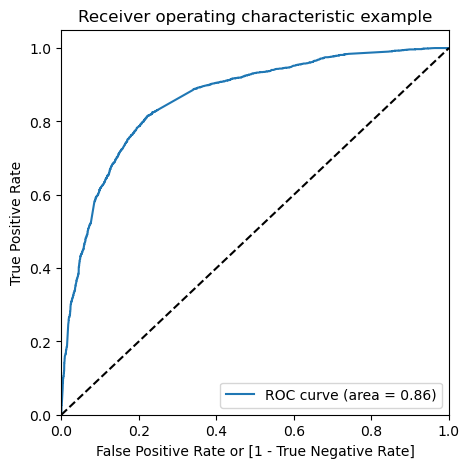

In [80]:
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_prob"])

#### Model is good as the area is high as 0.86

#### we have to finalize the cut off point for fetting balanced sensitivity and specificity 

In [81]:
# Create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final["Converted_prob"].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.133534,2179,0,1,1,0,0,0,0,0,0,0,0
1,0,0.225095,3504,0,1,1,1,0,0,0,0,0,0,0
2,0,0.508379,5038,1,1,1,1,1,1,1,0,0,0,0
3,0,0.321395,3460,0,1,1,1,1,0,0,0,0,0,0
4,1,0.024441,7421,0,1,0,0,0,0,0,0,0,0,0


In [82]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.377364  1.000000  0.000000
0.1   0.1  0.552175  0.977861  0.294177
0.2   0.2  0.710593  0.906850  0.591646
0.3   0.3  0.790038  0.817043  0.773671
0.4   0.4  0.799811  0.751880  0.828861
0.5   0.5  0.794609  0.658312  0.877215
0.6   0.6  0.789092  0.582707  0.914177
0.7   0.7  0.756305  0.442774  0.946329
0.8   0.8  0.731557  0.347953  0.964051
0.9   0.9  0.678436  0.165831  0.989114


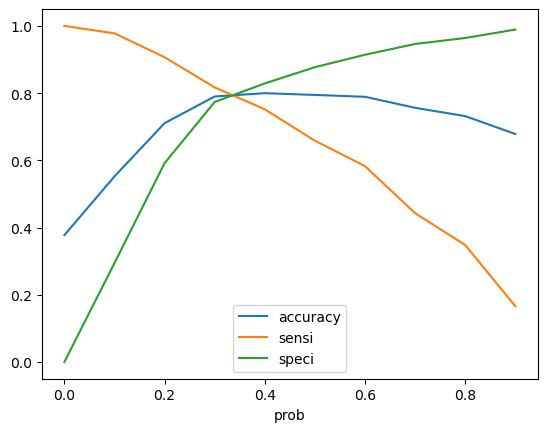

In [83]:
# Plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the anove graph 0.33 is the cutoff , at this cuttoff sensitivity and specicitivity both is taken care in mind.

In [84]:
y_train_pred_final['final_predict'] = y_train_pred_final["Converted_prob"].map(lambda x: 1 if x > 0.33 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predict
0,0,0.133534,2179,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.225095,3504,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.508379,5038,1,1,1,1,1,1,1,0,0,0,0,1
3,0,0.321395,3460,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.024441,7421,0,1,0,0,0,0,0,0,0,0,0,0


In [85]:
# Assigning the lead_score to the trianing set

In [86]:
y_train_pred_final['Lead_Score'] = y_train_pred_final["Converted_prob"].map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predict,Lead_Score
0,0,0.133534,2179,0,1,1,0,0,0,0,0,0,0,0,0,13
1,0,0.225095,3504,0,1,1,1,0,0,0,0,0,0,0,0,23
2,0,0.508379,5038,1,1,1,1,1,1,1,0,0,0,0,1,51
3,0,0.321395,3460,0,1,1,1,1,0,0,0,0,0,0,0,32
4,1,0.024441,7421,0,1,0,0,0,0,0,0,0,0,0,0,2


### Precision and Recall

In [87]:
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5121,0,5.0,38,2.5,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
686,0,8.0,978,2.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4091,0,3.0,1390,3.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
737,0,0.0,0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5230,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [89]:
# Adding columns which are there in train set
X_test=X_test[col5]

In [90]:
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Notable Activity_Email Bounced,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
5121,0,-0.807487,0,0,0,0,0,0,0,0,0,0,0,0,0
686,0,0.931007,0,0,0,0,0,0,0,0,0,0,0,0,0
4091,0,1.692985,0,0,0,0,0,0,0,0,0,0,0,0,0
737,0,-0.877766,0,0,0,1,0,0,0,0,0,0,0,0,0
5230,0,-0.877766,0,1,0,0,0,0,0,0,0,0,0,0,0


In [91]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

In [92]:
# Predictions on the test set
y_test_pred = result.predict(X_test_sm)
y_test_pred.head()

5121    0.115498
686     0.477848
4091    0.682384
737     0.970237
5230    0.261572
dtype: float64

In [93]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
5121,0.115498
686,0.477848
4091,0.682384
737,0.970237
5230,0.261572


In [94]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [95]:
# Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [96]:
# Removing index for both dataframes to append them side by side 
y_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [97]:
# Appending y_test_df and y_pred
y_pred_final = pd.concat([y_test_df, y_pred],axis=1)

In [98]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,5121,0.115498
1,1,686,0.477848
2,1,4091,0.682384
3,1,737,0.970237
4,0,5230,0.261572


In [99]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,5121,0.115498
1,1,686,0.477848
2,1,4091,0.682384
3,1,737,0.970237
4,0,5230,0.261572


In [100]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,5121,0,0.115498
1,686,1,0.477848
2,4091,1,0.682384
3,737,1,0.970237
4,5230,0,0.261572


In [101]:
# Applying the cut off 
y_pred_final['final_predicted'] = y_pred_final["Converted_prob"].map(lambda x: 1 if x > 0.33 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,5121,0,0.115498,0
1,686,1,0.477848,1
2,4091,1,0.682384,1
3,737,1,0.970237,1
4,5230,0,0.261572,0


In [102]:
# Overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final["Converted"], y_pred_final["final_predicted"]))

Accuracy : 0.7889705882352941


In [103]:
# Making the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final["Converted"], y_pred_final["final_predicted"])
confusion2

array([[1281,  400],
       [ 174,  865]], dtype=int64)

In [104]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0]

In [105]:
# sensitivity
print("Sensitivity:",TP / float(TP+FN))

Sensitivity: 0.8325312800769971


In [106]:
# specificity
print("Specificity:",TN / float(TN+FP))

Specificity: 0.7620464009518144


In [107]:
# Lead score to the testing data
y_pred_final['Lead_Score'] = y_pred_final["Converted_prob"].map(lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,5121,0,0.115498,0,12
1,686,1,0.477848,1,48
2,4091,1,0.682384,1,68
3,737,1,0.970237,1,97
4,5230,0,0.261572,0,26


In [108]:
# Hot leads are those leads which have more than 80 percentage of Lead Score
hot_leads=y_pred_final[y_pred_final["Lead_Score"]>=80]
hot_leads

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
3,737,1,0.970237,1,97
13,3288,1,0.884365,1,88
18,1278,1,0.971038,1,97
23,5877,0,0.948018,1,95
35,4123,1,0.994678,1,99
...,...,...,...,...,...
2685,5818,1,0.971038,1,97
2687,7193,1,0.844855,1,84
2697,2339,1,0.884365,1,88
2700,7053,1,0.982498,1,98


In [109]:
# To check which feature is usefull for finding the lead customer
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6344
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2850.9
Date:                Mon, 14 Aug 2023   Deviance:                       5701.8
Time:                        20:56:43   Pearson chi2:                 6.53e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3474
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.1314      0.051    -22.150      0.000      -1.232      -1.031
Do Not Email                                      -1.4542      0.206     -7.046      0.000      -1.859      -1.050
Total Time Spent on Website                        1.1200      0.039     28.810      0.000       1.044       1.196
Lead Origin_Lead Import                            1.5340      0.432      3.553      0.000       0.688       2.380
Lead Source_Olark Chat                             1.0767      0.098     10.952      0.000       0.884       1.269
Lead Source_Reference                              4.1489      0.224     18.562      0.000       3.711       4.587
Lead Source_Welingak Website                       5.5988      0.726      7.716      0.000       4.177       7.021
Last Activity_Converted to Lead                   -1.1212      0.190     -5.894      0.000      -1.494      -0.748
Last Activity_Email Bounced                       -1.3513      0.502     -2.692      0.007      -2.335      -0.367
Last Activity_Olark Chat Conversation             -1.4655      0.153     -9.607      0.000      -1.764      -1.166
Last Activity_Page Visited on Website             -0.5572      0.141     -3.944      0.000      -0.834      -0.280
Last Notable Activity_Email Bounced                1.7066      0.655      2.607      0.009       0.424       2.990
Last Notable Activity_Had a Phone Conversation     3.0704      1.106      2.775      0.006       0.902       5.239
Last Notable Activity_SMS Sent                     1.4779      0.079     18.600      0.000       1.322       1.634
Last Notable Activity_Unreachable                  1.3697      0.477      2.870      0.004       0.434       2.305
Last Notable Activity_Unsubscribed                 1.4532      0.478      3.039      0.002       0.516       2.391
==================================================================================================================
"""

In [113]:
thresholds = [90, 80, 70, 60, 50]

for threshold in thresholds:
    filtered_rows = y_pred_final[y_pred_final['Lead_Score'] > threshold]
    row_count = len(filtered_rows)
    print(f"Number of rows with Lead_score > {threshold}: {row_count}")

Number of rows with Lead_score > 90: 228
Number of rows with Lead_score > 80: 429
Number of rows with Lead_score > 70: 578
Number of rows with Lead_score > 60: 813
Number of rows with Lead_score > 50: 957


In [110]:
# These are the columns which are helping for conversion on lead.
result.params.sort_values(ascending=False)

Lead Source_Welingak Website                      5.598763
Lead Source_Reference                             4.148916
Last Notable Activity_Had a Phone Conversation    3.070394
Last Notable Activity_Email Bounced               1.706631
Lead Origin_Lead Import                           1.533953
Last Notable Activity_SMS Sent                    1.477947
Last Notable Activity_Unsubscribed                1.453244
Last Notable Activity_Unreachable                 1.369703
Total Time Spent on Website                       1.119998
Lead Source_Olark Chat                            1.076674
Last Activity_Page Visited on Website            -0.557229
Last Activity_Converted to Lead                  -1.121188
const                                            -1.131392
Last Activity_Email Bounced                      -1.351311
Do Not Email                                     -1.454154
Last Activity_Olark Chat Conversation            -1.465493
dtype: float64

## Conclusion



#### Train Data Accuracy ,Sensitivity and Specificity
1. Accuracy    : 79.27%
2. Sensitivity : 80.61%
3. Specificity : 78.45%

#### Test Data Accuracy ,Sensitivity and Specificity
1. Accuracy    : 78.89%
2. Sensitivity : 83.25%
3. Specificity : 76.20%

### Lead Count for Different Lead Score 

1. Number of rows with Lead_score > 90: 228
2. Number of rows with Lead_score > 80: 429
3. Number of rows with Lead_score > 70: 578
4. Number of rows with Lead_score > 60: 813
5. Number of rows with Lead_score > 50: 957

### The variables with the greatest impact are those that possess the highest coefficient values are :
1. Lead Source_Welingak Website : 5.598763
2. Lead Source_Reference : 4.148916
3. Last Notable Activity_Had a Phone Conversation : 3.070394